In [1]:
from AutoMushroom import AutoMushroom
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

/Users/klaudiakwoka/anaconda3/envs/AutoML/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Downloading datasets

In [2]:
path1 = kagglehub.dataset_download("prishasawhney/mushroom-dataset")
path2 = kagglehub.dataset_download("devzohaib/mushroom-edibility-classification")
path4 = kagglehub.dataset_download("uciml/mushroom-classification")

In [3]:
data1 = pd.read_csv(f"{path1}/mushroom_cleaned.csv")
data2 = pd.read_csv(f"{path2}/secondary_data.csv", delimiter=";")
data4 = pd.read_csv(f"{path4}/mushrooms.csv") 

In [4]:
y1 = data1["class"]
X1 = data1.drop("class", axis=1)

In [5]:
y2 = data2["class"]
X2 = data2.drop("class", axis=1)
y2 = y2.map({'p': 1, 'e': 0})

In [6]:
y4 = data4["class"]
X4 = data4.drop("class", axis=1)
y4 = y4.map({'p': 1, 'e': 0})

In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=10)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=10)

# Using the AutoMushroom class

### Dataset 1

Pakiet AutoML dla grzybiarzy
Analizowane są zbiory danych z podziałem na klasy 0 lub 1, gdzie 0 oznacza jadalny grzyb, a 1 trujący.
Analiza danych:
Liczba wierszy: 455
Liczba kolumn: 30
Liczba zmiennych kategorycznych: 0
Liczba zmiennych numerycznych: 30
Nie ma braków danych.
Balans klas:


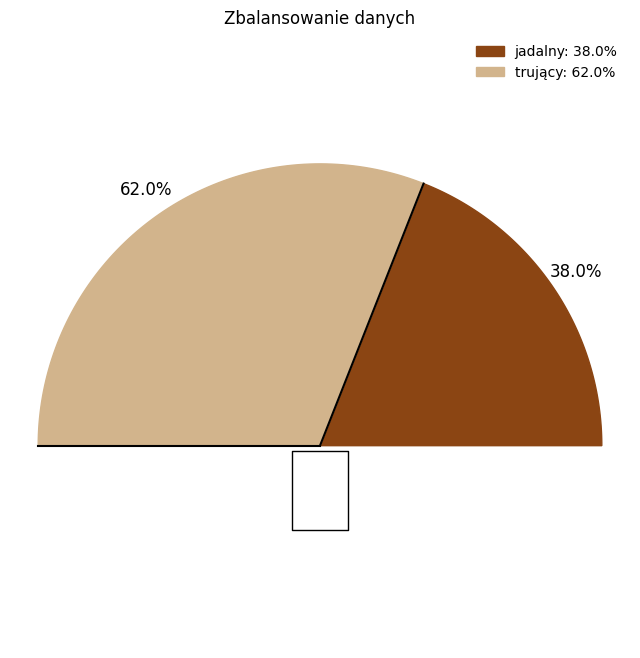

Zbiór jest zbalansowany.
Preprocessing składa się z kilku etapów:
Numeryczne dane są wypełniane średnią w przypadku braków, a następnie skalowane do zakresu [0,1] przy użyciu MinMaxScaler.
Dane kategoryczne są uzupełniane najczęściej występującymi wartościami, a następnie kodowane za pomocą metody one-hot encoding.
W trybie treningowym wybierane są istotne cechy za pomocą klasyfikatora Random Forest i SelectFromModel, a dane testowe są ograniczane do wybranych cech.
Ważność cech:
Łącznie wybrano 9 cech.
Wybrane cechy:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')
Analiza jakości modeli i konfiguracja finalnego komitetu:
1. Miara oceny modeli:
   Do analizy jakości modeli wykorzystano kombinację ważonych miar ROC AUC oraz Recall:
   Custom Score = (Recall: 0.3, ROC AUC: 0.7)

2. Modele użyte w analizie: KNeighborsClassifier, Gradie

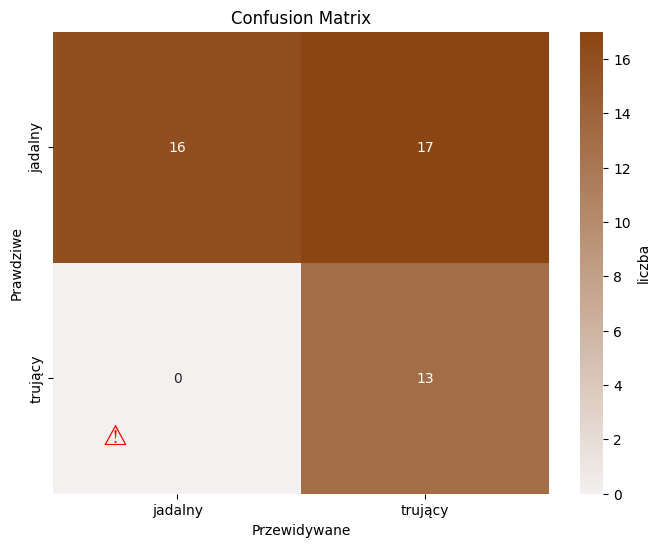

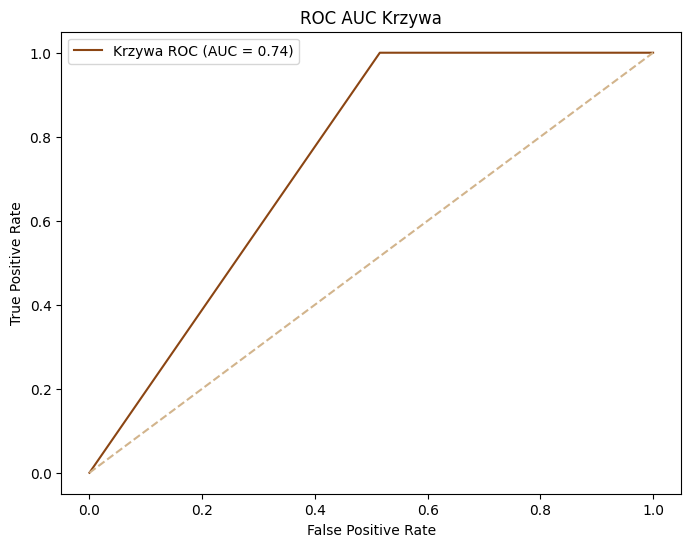

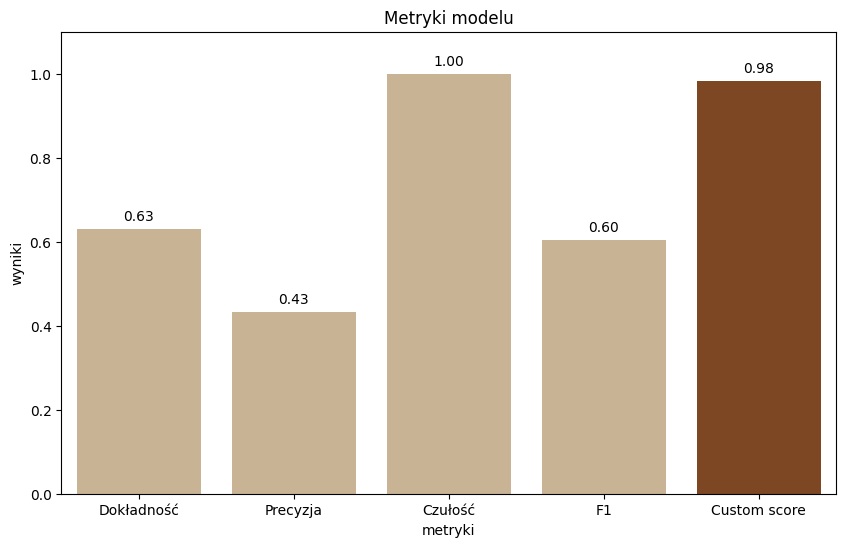

Model osiągnął niską dokładność (<80%).
Może być ryzykowny w praktycznym zastosowaniu i wymaga optymalizacji.

Model ma bardzo wysoką czułość (>90%),
co oznacza, że potrafi niemal bezbłędnie wykrywać trujące grzyby.
To kluczowa cecha dla zapewnienia bezpieczeństwa.

Precyzja modelu jest niska (<80%).
Może prowadzić do błędów, gdzie jadalne grzyby są mylone z trującymi,
co może zniechęcać użytkowników.

Wynik F1 modelu jest niski (<80%).
Model może mieć trudności z osiągnięciem dobrej równowagi między precyzją i czułością.

W przypadku klasyfikacji grzybów kluczowe znaczenie ma czułość (sensitivity/recall),
ponieważ pomyłka w postaci zaklasyfikowania trującego grzyba jako jadalny
może prowadzić do poważnych konsekwencji zdrowotnych.
Dlatego model powinien być zoptymalizowany pod kątem minimalizacji tego ryzyka.

Fit time
46.88029074668884


In [ ]:
automl = AutoMushroom()

In [19]:
automl.fit(X_train1, y_train1, mode = 'fast')

/Users/klaudiakwoka/anaconda3/envs/AutoML/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [4]:
y_pred1= automl.predict(X_test1)

NameError: name 'X_test1' is not defined

In [21]:
print(y_pred1)

[1 1 0 ... 1 1 1]


In [26]:
from AutoMushroom.model_selection import custom_score

In [27]:
custom_score(y_test1, y_pred1)

0.9598723439934738

In [22]:
automl.get_metrics()

{'accuracy': 0.9919064304397177,
 'precision': 0.9933069805048962,
 'recall': 0.9919702135295173,
 'f1': 0.9926381469677246,
 'roc_auc': 0.9918993329356482,
 'confusion_matrix': array([[18085,   149],
        [  179, 22113]]),
 'roc_curve': (array([0.        , 0.00817155, 1.        ]),
  array([0.        , 0.99197021, 1.        ]))}

In [23]:
automl.get_best_model()

VotingClassifier(estimators=[('RandomForestClassifier',
                              RandomForestClassifier(max_features=None,
                                                     min_samples_split=5,
                                                     n_estimators=1148)),
                             ('LogisticRegression',
                              LogisticRegression(C=0.1, max_iter=200))],
                 n_jobs=-1, voting='soft')

In [6]:
automl = AutoMushroom()
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

automl.fit(X_train, y_train)

/Users/klaudiakwoka/anaconda3/envs/AutoML/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [25]:
automl.get_best_score()

Pakiet AutoML dla grzybiarzy
Analizowane są zbiory danych z podziałem na klasy 0 lub 1, gdzie 0 oznacza jadalny grzyb, a 1 trujący.
Analiza danych:
Liczba wierszy: 455
Liczba kolumn: 30
Liczba zmiennych kategorycznych: 0
Liczba zmiennych numerycznych: 30
Nie ma braków danych.
Balans klas:


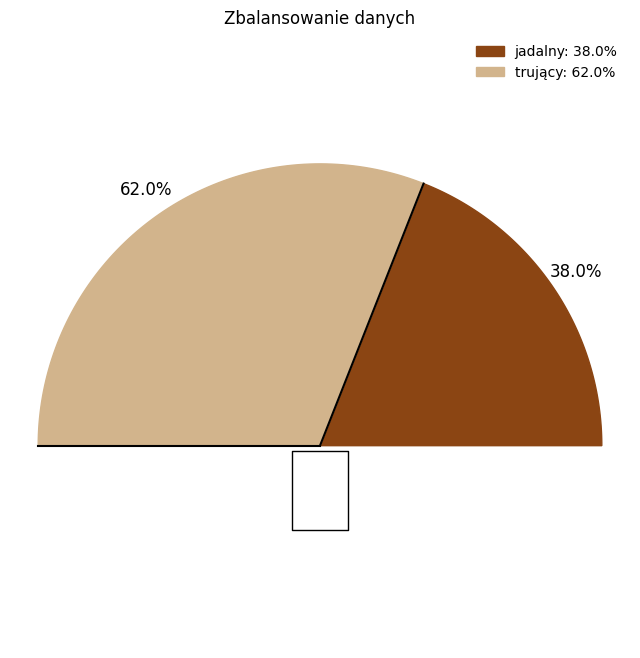

Zbiór jest zbalansowany.
Preprocessing składa się z kilku etapów:
Numeryczne dane są wypełniane średnią w przypadku braków, a następnie skalowane do zakresu [0,1] przy użyciu MinMaxScaler.
Dane kategoryczne są uzupełniane najczęściej występującymi wartościami, a następnie kodowane za pomocą metody one-hot encoding.
W trybie treningowym wybierane są istotne cechy za pomocą klasyfikatora Random Forest i SelectFromModel, a dane testowe są ograniczane do wybranych cech.
Ważność cech:
Łącznie wybrano 9 cech.
Wybrane cechy:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')
Analiza jakości modeli i konfiguracja finalnego komitetu:
1. Miara oceny modeli:
   Do analizy jakości modeli wykorzystano kombinację ważonych miar ROC AUC oraz Recall:
   Custom Score = (Recall: 0.3, ROC AUC: 0.7)

2. Modele użyte w analizie: KNeighborsClassifier, Gradie

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=1)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.004944318061586537,
                                                         max_depth=4,
                                                         n_estimators=463,
                                                         subsample=0.27830963172967327)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=10,
                                                     n_estimators=734)),
                             ('LogisticRegression',
                              LogisticRegression(C=1421.7005760152697,
                                                 max_iter=3000,
                                                 solver='liblinear'))],
                 n_jobs=-1)

In [3]:
automl.summary_report()

### Dataset 2

In [43]:
automl2 = AutoMushroom()

In [ ]:
automl2.fit(X_train2, y_train2)

/Users/klaudiakwoka/anaconda3/envs/AutoML/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [17]:
y_pred2= automl2.predict(X_test2)

In [18]:
print(y_pred2)

[0 1 1 ... 0 0 1]


In [19]:
automl2.get_metrics()

{'accuracy': 0.9915948040606921,
 'precision': 0.9966842207918861,
 'recall': 0.988394584139265,
 'f1': 0.9925220938137321,
 'roc_auc': 0.9920675000375604,
 'confusion_matrix': array([[3974,   17],
        [  60, 5110]]),
 'roc_curve': (array([0.        , 0.00425958, 1.        ]),
  array([0.        , 0.98839458, 1.        ]))}

In [20]:
automl2.get_best_model()

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance')),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('LogisticRegression',
                              LogisticRegression(C=0.1, max_iter=200)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         max_depth=5,
                                                         n_estimators=50))],
                 n_jobs=-1, voting='soft')

### Dataset 4

In [21]:
automl4 = AutoMushroom()

In [22]:
automl4.fit(X_train4, y_train4)

/Users/klaudiakwoka/anaconda3/envs/AutoML/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [23]:
y_pred4= automl4.predict(X_test4)

In [24]:
print(y_pred4)

[1 0 0 ... 1 0 0]


In [25]:
automl4.get_metrics()

{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': 1.0,
 'confusion_matrix': array([[621,   0],
        [  0, 598]]),
 'roc_curve': (array([0., 0., 1.]), array([0., 1., 1.]))}

In [26]:
automl4.get_best_model()

KNeighborsClassifier(n_neighbors=7, weights='distance')